<a href="https://colab.research.google.com/github/GeraldoLucas/Covid-analise-DNC/blob/main/Covid_Analise2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Após o download do arquivo em .csv que possui cerca de 630 MB, o arquivo foi importado em um editor de texto (Pycharm, no meu caso), e , logo em seguida, foi selecionado algumas das várias colunas disponilibilizadas pelo Ministério da Saúde, a ficha de notificação e o dicionario dos dados estão destacados:


*   [FICHA DE REGISTRO INDIVIDUAL (SRAG) ](https://opendatasus.saude.gov.br/dataset/ae90fa8f-3e94-467e-a33f-94adbb66edf8/resource/54a46c6d-e0b5-40b7-8b74-85450d22ace3/download/ficha-srag-final-27.07.2020_final.pdf)
*   [Dicionário de Dados ](https://opendatasus.saude.gov.br/dataset/ae90fa8f-3e94-467e-a33f-94adbb66edf8/resource/8f571374-c555-4ec0-8e44-00b1e8b11c25/download/dicionario-de-dados-srag-hospitalizado-27.07.2020-final.pdf)


In [ ]:
# Importação de bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', 0)

# Importar dos dados sobre Doenças Neurológicas Crônicas em pacientes com Covid para um DataFrame
uri = r"C:/Users/***/***/******/*****/********/******/INFLUD-15-03-2021.csv"
dF = pd.read_csv(uri, sep=';',
                 error_bad_lines=True,
                 warn_bad_lines=True,
                 engine="python",
                 encoding='UTF-8')

print(f"Número total de Casos considerados: {dF.shape[0]}")

# Selecionando colunas consideradas na análise
dF_columns = ['ID_MUNICIP',
              'NU_IDADE_N',
              'CS_SEXO',
              'DT_SIN_PRI',
              'NEUROLOGIC',
              'PERD_OLFT',
              'PERD_PALA',
              'CLASSI_FIN',
              'CRITERIO',
              'EVOLUCAO',]

dF_review = dF.loc[:, dF_columns].copy()

# Exportando a tabela gerada para um novo Csv para trabalho de dados
dF_review.to_csv('dF_review.csv', index=False)

O conjunto de dados contém 1.186.861 linhas e 154 colunas.  

---

Considerando o grande volume de informações, o primeiro a ser feito foi o recolhimento de registros específicos úteis na análise como, município, idade, sexo, Doença Neurológica Crônica etc.

In [1]:
# Importação bibliotecas necessárias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

uri = "drive/MyDrive/dF_review.csv"

dataFrame = pd.read_csv(uri,                  
                 error_bad_lines=True,
                 warn_bad_lines=True,
                 engine="python",
                 encoding='UTF-8')

# Número de Casos Iniciais considerados: 1.186.861 linhas e 10 colunas.
print(f"Totais  de Casos: {dataFrame.shape[0]} linhas e {dataFrame.shape[1]} colunas.")

# Considerando apenas dados válidos do Universo
dataFrame = dataFrame.dropna(subset=["NEUROLOGIC", 
                                     "PERD_OLFT", 
                                     "PERD_PALA", 
                                    ])

# Casos úteis considerados: 303.225  linhas e 10 colunas.
print(f"Casos úteis considerados: {dataFrame.shape[0]} linhas e {dataFrame.shape[1]} colunas.")
dataFrame.head(10)

Totais  de Casos: 1186861 linhas e 10 colunas.
Casos úteis considerados: 303225 linhas e 10 colunas.


,ID_MUNICIP,NU_IDADE_N,CS_SEXO,DT_SIN_PRI,NEUROLOGIC,PERD_OLFT,PERD_PALA,CLASSI_FIN,CRITERIO,EVOLUCAO
49,TUPA,67,F,09/03/2020,2.0,2.0,2.0,4.0,1.0,1.0
379,JARAGUA DO SUL,54,M,09/04/2020,2.0,1.0,1.0,5.0,1.0,1.0
389,BELO HORIZONTE,74,F,07/04/2020,2.0,2.0,2.0,5.0,1.0,1.0
409,MORADA NOVA,81,F,05/04/2020,2.0,2.0,2.0,4.0,1.0,2.0
484,ALTAMIRA,81,M,15/04/2020,2.0,2.0,2.0,5.0,1.0,1.0
502,JOAO PESSOA,84,F,23/04/2020,2.0,2.0,2.0,4.0,1.0,1.0
525,BELO HORIZONTE,88,M,28/04/2020,2.0,2.0,2.0,4.0,3.0,1.0
550,OSASCO,83,M,16/04/2020,2.0,2.0,1.0,5.0,1.0,1.0
576,SAO LUIS,57,M,08/04/2020,2.0,2.0,2.0,5.0,NaN,NaN
582,PORTO ALEGRE,8,M,09/04/2020,2.0,2.0,2.0,4.0,1.0,1.0


Realizado o tratamento inicial dos dados considerando apenas valores numéricos, respondidos no registro de paciente, além disso buscamos os pacientes que tiveram "Sim" para DNC e "Positivo" para Covid.

In [4]:
# Pacientes com Covid: 178251 linhas.
dF_pacientes_covid = dataFrame.loc[dataFrame["CLASSI_FIN"] == 5]

# Pacientes com Covid e DNC: 12.704 linhas.
dF_pacientes_dnc = dF_pacientes_covid.loc[dataFrame["NEUROLOGIC"] == 1]

# Pacientes com Covid e Sem DNC: 161.188 linhas.
dF_pacientes_sem_dnc = dF_pacientes_covid.loc[dataFrame["NEUROLOGIC"] == 2]

print(f"O paciente mais velho com DNC e covid: {dF_pacientes_dnc['NU_IDADE_N'].max()} anos.")
print(f"O paciente mais jovem com DNC e covid: {dF_pacientes_dnc['NU_IDADE_N'].min()} anos.")
print(f"Média Geral de idade dos paciente com DNC e covid: {dF_pacientes_dnc['NU_IDADE_N'].mean():.2f} anos.")
print(f"Diferença de Infecção entre sexos: \n{dF_pacientes_dnc.CS_SEXO.value_counts(normalize=False)}")
dF_pacientes_dnc.head(10)

O paciente mais velho com DNC e covid: 110 anos.
O paciente mais jovem com DNC e covid: 0 anos.
Média Geral de idade dos paciente com DNC e covid: 71.29 anos.
Diferença de Infecção entre sexos: 
M    6424
F    6279
I       1
Name: CS_SEXO, dtype: int64


,ID_MUNICIP,NU_IDADE_N,CS_SEXO,DT_SIN_PRI,NEUROLOGIC,PERD_OLFT,PERD_PALA,CLASSI_FIN,CRITERIO,EVOLUCAO
3216,CONTAGEM,90,F,06/07/2020,1.0,2.0,2.0,5.0,2.0,2.0
3733,ARACAJU,77,M,19/07/2020,1.0,2.0,2.0,5.0,1.0,2.0
3966,SAO PAULO,82,F,25/07/2020,1.0,2.0,2.0,5.0,1.0,1.0
4010,SAO JOSE DO RIO PRETO,75,F,30/07/2020,1.0,2.0,2.0,5.0,1.0,2.0
4027,ANAPOLIS,71,F,18/07/2020,1.0,2.0,2.0,5.0,1.0,2.0
4047,SANTA MARIA,75,M,09/08/2020,1.0,2.0,2.0,5.0,1.0,2.0
4071,AMERICO BRASILIENSE,29,F,25/07/2020,1.0,2.0,2.0,5.0,1.0,2.0
4154,GOIANIA,75,F,30/07/2020,1.0,2.0,2.0,5.0,1.0,2.0
4177,TERESINA,84,M,12/07/2020,1.0,2.0,2.0,5.0,1.0,2.0
4257,SAO BERNARDO DO CAMPO,75,M,16/07/2020,1.0,2.0,2.0,5.0,1.0,2.0


### Contagem de infecção para pacientes do grupo de risco para DNC

Uma primeira análise feita diz respeito ao número de acometidos pela Covid com DNC e a tendência do gráfico. Nesse sentido, uma informação facilmente percebida no gráfico é que **há mais pacientes idosos na relação**, além de uma **taxa de óbitos de cerca de 51%**, muito maior que em pacientes sem DNC. 


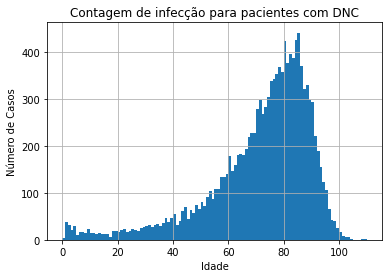

Taxa de óbitos para DCN infectados: 0.51.


In [5]:
# Distribuição etária para DNC infectados
age = dF_pacientes_dnc["NU_IDADE_N"].value_counts(normalize=False)
interval = (dF_pacientes_dnc['NU_IDADE_N'].max() - dF_pacientes_dnc['NU_IDADE_N'].min())

dF_pacientes_dnc.hist(column="NU_IDADE_N", bins=interval)
plt.xlabel('Idade')
plt.ylabel('Número de Casos')
plt.title(f"Contagem de infecção para pacientes com DNC")
plt.grid(True)
plt.show()

# Taxa Percentual de Óbitos para DCN infectados
dF_obitos = dF_pacientes_dnc.loc[dF_pacientes_dnc["EVOLUCAO"] == 2].shape[0]
dF_total = dF_pacientes_dnc['EVOLUCAO'].shape[0]

print(f"Taxa de óbitos para DCN infectados: {(dF_obitos / dF_total):.2f}.")

### 1°) O Covid-19 interfere nos receptores de olfato ao cérebro (Anosmia). 

Na análise percentual dos dados de pacientes que relataram algum tipo de perda de olfato, obteve-se os seguintes resultados; 
> Naqueles que **não possuiam DNC, um total 17.909 casos (cerca de 11,44% do total dos casos sem DNC)**.

> Enquanto que naqueles que **possuiam DNC, um total de 761 casos (cerca de 6,40% dos casos de DNC)**.

Pacientes com DNC e Perda de Olfato: 761, percentual 0.06
761, 11132.
=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
Pacientes SEM DNC e Perda de Olfato: 17909, percentual 0.11
17909, 138663.


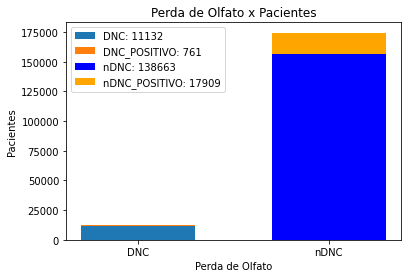

In [6]:
# Pacientes com DNC e Perda de Olfato
dF_dnc_olfat = dF_pacientes_dnc.loc[dF_pacientes_dnc["PERD_OLFT"] != 9]

dnc_positive_olfat = dF_dnc_olfat.PERD_OLFT.value_counts(normalize=False)[1]
dnc_negative_olfat = dF_dnc_olfat["PERD_OLFT"].value_counts(normalize=False)[2]
tot = (dnc_positive_olfat + dnc_negative_olfat) 

print(f"Pacientes com DNC e Perda de Olfato: {dnc_positive_olfat}, percentual {(dnc_positive_olfat / tot):.2f}")
print(f"{dnc_positive_olfat}, {dnc_negative_olfat}.")

print("=-=-" * 15 + "=-=")


# Pacientes sem DNC e Perda de Olfato
dF_nDnc_olfat = dF_pacientes_sem_dnc.loc[dF_pacientes_sem_dnc["PERD_OLFT"] != 9]

nDnc_positive_olfat = dF_nDnc_olfat["PERD_OLFT"].value_counts(normalize=False)[1]
nDnc_negative_olfat = dF_nDnc_olfat["PERD_OLFT"].value_counts(normalize=False)[2]
tot2 = (nDnc_positive_olfat + nDnc_negative_olfat) 

print(f"Pacientes SEM DNC e Perda de Olfato: {nDnc_positive_olfat}, percentual {(nDnc_positive_olfat / tot2):.2f}")
print(f"{nDnc_positive_olfat}, {nDnc_negative_olfat}.")


# Plotando as distribuições em um gráfico
plt.bar("DNC", tot, 0.6, label=f"DNC: {tot - dnc_positive_olfat}")
plt.bar("DNC", dnc_positive_olfat, 0.6, bottom=tot, label=f"DNC_POSITIVO: {dnc_positive_olfat}")

plt.bar("nDNC", tot2, 0.6, label=f"nDNC: {tot2 - nDnc_positive_olfat}", color="blue")
plt.bar("nDNC", nDnc_positive_olfat, 0.6, bottom=tot2, label=f"nDNC_POSITIVO: {nDnc_positive_olfat}", color="orange")

plt.xlabel("Perda de Olfato")
plt.ylabel("Pacientes")
plt.title("Perda de Olfato x Pacientes")
plt.legend()
plt.show()

### 2°) O Covid-19 interfere nos receptores que levam o paladar ao cérebro (Disgeusia).
Na análise percentual dos dados de pacientes que relataram algum tipo de perda de paladar, obteve-se os seguintes resultados;

Naqueles que **não possuiam DNC, um total 18.331 casos (cerca de 11.71% do total dos casos sem DNC).**

Enquanto que naqueles que **possuiam DNC, um total de 777 casos (cerca de 6.54% dos casos de DNC).**

Pacientes com DNC e Perda de Paladar: 777, percentual 0.07
777, 11098.
=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
Pacientes SEM DNC e Perda de Olfato: 18331, percentual 0.12
18331, 138189.


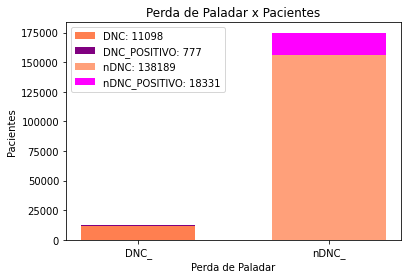

In [8]:
# Pacientes com DNC e Perda de Paladar
dF_dnc_palad = dF_pacientes_dnc.loc[dF_pacientes_dnc["PERD_PALA"] != 9]

dnc_positive_palad = dF_dnc_palad.PERD_PALA.value_counts(normalize=False)[1]
dnc_negative_palad = dF_dnc_palad["PERD_PALA"].value_counts(normalize=False)[2]
tot3 = (dnc_positive_palad + dnc_negative_palad) 

print(f"Pacientes com DNC e Perda de Paladar: {dnc_positive_palad}, percentual {(dnc_positive_palad / tot3):.2f}")
print(f"{dnc_positive_palad}, {dnc_negative_palad}.")

print("=-=-" * 15 + "=-=")


# Pacientes sem DNC e Perda de Paladar
dF_nDnc_palad = dF_pacientes_sem_dnc.loc[dF_pacientes_sem_dnc["PERD_PALA"] != 9]

nDnc_positive_palad = dF_nDnc_palad["PERD_PALA"].value_counts(normalize=False)[1]
nDnc_negative_palad = dF_nDnc_palad["PERD_PALA"].value_counts(normalize=False)[2]
tot4 = (nDnc_positive_palad + nDnc_negative_palad) 

print(f"Pacientes SEM DNC e Perda de Olfato: {nDnc_positive_palad}, percentual {(nDnc_positive_palad / tot4):.2f}")
print(f"{nDnc_positive_palad}, {nDnc_negative_palad}.")


# Plotando as distribuições em um gráfico
plt.bar("DNC_", tot3, 0.6, label=f"DNC: {tot3 - dnc_positive_palad}", color="coral")
plt.bar("DNC_", dnc_positive_palad, 0.6, bottom=tot3, label=f"DNC_POSITIVO: {dnc_positive_palad}", color="purple")

plt.bar("nDNC_", tot4, 0.6, label=f"nDNC: {tot4 - nDnc_positive_palad}", color="lightsalmon")
plt.bar("nDNC_", nDnc_positive_palad, 0.6, bottom=tot4, label=f"nDNC_POSITIVO: {nDnc_positive_palad}", color="fuchsia")

plt.xlabel("Perda de Paladar")
plt.ylabel("Pacientes")
plt.title("Perda de Paladar x Pacientes")
plt.legend()
plt.show()

### Dupla análise de Anosmia e Disgeusia
Na análise percentual dos dados de pacientes que relataram algum tipo de perda de paladar e de olfato, obteve-se os seguintes resultados;

Naqueles que **não possuiam DNC, um total 14.045 casos (cerca de 8,98% do total dos casos sem DNC).**

Enquanto que naqueles que **possuiam DNC, um total de 562 casos (cerca de 4,74% dos casos de DNC).**

DNC com perda de paladar e olfato: 562, percentualmente: 0.05.
562, 11294.
=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
SEM DNC com perda de paladar e olfato: 14045, percentualmente: 0.09.
14045, 142302.


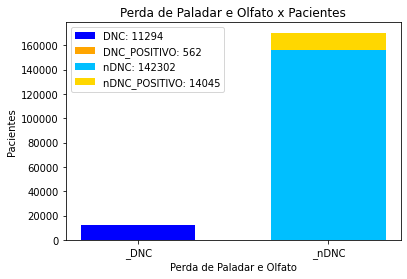

In [9]:
# Dados de DNC que tiveram perda de olfato e paladar
dF_dnc_olfat_palad = dF_pacientes_dnc.loc[dF_pacientes_dnc["PERD_OLFT"] != 9]
dF_dnc_olfat_palad = dF_dnc_olfat_palad[dF_dnc_olfat_palad["PERD_PALA"] != 9]
tot_olfat_palad = dF_dnc_olfat_palad.copy()

dF_dnc_olfat_palad = dF_dnc_olfat_palad.loc[dF_dnc_olfat_palad["PERD_OLFT"] == 1]
dF_dnc_olfat_palad = dF_dnc_olfat_palad.loc[dF_dnc_olfat_palad["PERD_PALA"] == 1]

dnc_positive_olfat_palad = dF_dnc_olfat_palad.shape[0]
tot5 = tot_olfat_palad.shape[0] 

print(f"DNC com perda de paladar e olfato: {dnc_positive_olfat_palad}, percentualmente: {(dnc_positive_olfat_palad / tot5):.2f}.")
print(f"{dnc_positive_olfat_palad}, {tot_olfat_palad.shape[0] - dnc_positive_olfat_palad}.")


print("=-=-" * 15 + "=-=")
# Pacientes sem DNC e Perda de Olfato e Paladar
dF_nDnc_olfat_palad = dF_pacientes_sem_dnc.loc[dF_pacientes_sem_dnc["PERD_OLFT"] != 9]
dF_nDnc_olfat_palad = dF_nDnc_olfat_palad.loc[dF_nDnc_olfat_palad["PERD_PALA"] != 9]
tot_olfat_palad2 = dF_nDnc_olfat_palad.copy()

dF_nDnc_olfat_palad = dF_nDnc_olfat_palad.loc[dF_nDnc_olfat_palad["PERD_OLFT"] == 1]
dF_nDnc_olfat_palad = dF_nDnc_olfat_palad.loc[dF_nDnc_olfat_palad["PERD_PALA"] == 1]

nDnc_positive_olfat_palad = dF_nDnc_olfat_palad.shape[0]
tot6 = tot_olfat_palad2.shape[0] 

print(f"SEM DNC com perda de paladar e olfato: {nDnc_positive_olfat_palad}, percentualmente: {(nDnc_positive_olfat_palad / tot6):.2f}.")
print(f"{nDnc_positive_olfat_palad}, {tot_olfat_palad2.shape[0] - nDnc_positive_olfat_palad}.")


# Plotando as distribuições em um gráfico
plt.bar("_DNC", tot5, 0.6, label=f"DNC: {tot5 - dnc_positive_olfat_palad}", color="blue")
plt.bar("_DNC", dnc_positive_olfat_palad, 0.6, bottom=tot5, label=f"DNC_POSITIVO: {dnc_positive_olfat_palad}", color="orange")

plt.bar("_nDNC", tot6, 0.6, label=f"nDNC: {tot6 - nDnc_positive_olfat_palad}", color="deepskyblue")
plt.bar("_nDNC", nDnc_positive_olfat_palad, 0.6, bottom=tot6, label=f"nDNC_POSITIVO: {nDnc_positive_olfat_palad}", color="gold")

plt.xlabel("Perda de Paladar e Olfato")
plt.ylabel("Pacientes")
plt.title("Perda de Paladar e Olfato x Pacientes")
plt.legend()
plt.show()